In [ ]:
# Instalación de bibliotecas
!pip install tensorflow pandas matplotlib opencv-python scikit-learn


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/root/.kaggle"
!mkdir -p /root/.kaggle
!mv kaggle.json /root/.kaggle/

mv: cannot stat 'kaggle.json': No such file or directory


In [ ]:
#La importación de los datasets
!kaggle datasets download -d samaneheslamifar/facial-emotion-expressions
!kaggle datasets download -d missaouimohamedamine/face-emotion-dataset


Dataset URL: https://www.kaggle.com/datasets/samaneheslamifar/facial-emotion-expressions
License(s): unknown
 95% 114M/121M [00:01<00:00, 69.8MB/s]
100% 121M/121M [00:01<00:00, 77.8MB/s]
Dataset URL: https://www.kaggle.com/datasets/missaouimohamedamine/face-emotion-dataset
License(s): apache-2.0
 92% 113M/123M [00:01<00:00, 83.9MB/s]
100% 123M/123M [00:01<00:00, 75.5MB/s]


In [ ]:
#Descomprimimos los archivos
import zipfile
import os

download_dir = '/content/'

zip_files = [f for f in os.listdir(download_dir) if f.endswith('.zip')]

for zip_file in zip_files:
    zip_path = os.path.join(download_dir, zip_file)
    extract_dir = os.path.join(download_dir, zip_file.replace('.zip', ''))
    os.makedirs(extract_dir, exist_ok=True)

    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)  # Extraer todos los archivos
    print(f"Descomprimido: {zip_file} en {extract_dir}")


Descomprimido: facial-emotion-expressions.zip en /content/facial-emotion-expressions
Descomprimido: face-emotion-dataset.zip en /content/face-emotion-dataset


In [ ]:
# Mapeo de las etiquetas a las nuevas categorías numeradas
label_mapping = {
    'angry': 0,       # angry -> 0
    'neutral': 1,      # neutral -> 1
    'disgust': 2,      # disgust -> 2
    'fear': 3,         # fear -> 3
    'happy': 4,        # happy -> 4
    'sad': 5,      # sad -> 5
    'surprise': 6,     # surprise -> 6
}

In [ ]:
#Función para cargar imágenes
import os
import pandas as pd

# Función para cargar imágenes y etiquetarlas
def load_images_and_labels(dataset_path, label_mapping):
    image_paths = []
    labels = []

    # Recorrer las carpetas dentro del dataset
    for class_folder in os.listdir(dataset_path):
        class_path = os.path.join(dataset_path, class_folder)

        # Asegurarse de que es una carpeta (no un archivo)
        if os.path.isdir(class_path):
            # Normalizar el nombre de la carpeta a minúsculas
            normalized_class_folder = class_folder.lower()

            # Si la carpeta pertenece a alguna de las categorías con nombre variable
            if normalized_class_folder in ['angry', 'anger']:
                mapped_label = label_mapping['angry']
            elif normalized_class_folder in ['sad', 'sadness']:
                mapped_label = label_mapping['sad']
            elif normalized_class_folder in label_mapping:
                mapped_label = label_mapping[normalized_class_folder]
            else:
                print(f"Etiqueta no mapeada: {class_folder}")
                continue  # Si no se encuentra en el mapeo, se omite

            for img_name in os.listdir(class_path):
                img_path = os.path.join(class_path, img_name)
                image_paths.append(img_path)
                labels.append(mapped_label)

    # Crear un DataFrame con las rutas de imágenes y las etiquetas mapeadas
    df = pd.DataFrame({'image_path': image_paths, 'label': labels})
    return df


In [ ]:
#Esto se hace para el dataset que no tiene la misma estructura que los otros
#Dataset facial-emotion-recognition
# Diccionario de correcciones para los nombres de las imágenes
corrections = {
    'surprised': 'surprise',  # 'surprised' -> 'surprise'
    'anger': 'angry'          # 'anger' -> 'angry'
}

# Función para cargar imágenes y etiquetarlas
def load_images_and_labels_2(dataset_path, label_mapping, corrections):
    image_paths = []
    labels = []

    # Recorrer las carpetas dentro del dataset (cada carpeta es un sujeto)
    for subject_folder in os.listdir(dataset_path):
        subject_path = os.path.join(dataset_path, subject_folder)

        # Asegurarse de que es una carpeta (no un archivo)
        if os.path.isdir(subject_path):
            for img_name in os.listdir(subject_path):
                img_path = os.path.join(subject_path, img_name)

                # Usar el nombre de la imagen sin la extensión y convertirlo a minúsculas
                img_name_lower = img_name.lower().split('.')[0]

                # Corregir el nombre si tiene alguna de las variaciones que deben ser mapeadas
                if img_name_lower in corrections:
                    img_name_lower = corrections[img_name_lower]

                # Buscar el mapeo para la etiqueta
                mapped_label = label_mapping.get(img_name_lower, None)
                if mapped_label is None:
                    print(f"Etiqueta no mapeada: {img_name_lower} en la carpeta {subject_folder}")
                    continue  # Si la etiqueta no está mapeada, la imagen se omite

                image_paths.append(img_path)
                labels.append(mapped_label)

    # Crear un DataFrame con las rutas de imágenes y las etiquetas mapeadas
    df = pd.DataFrame({'image_path': image_paths, 'label': labels})
    return df



In [ ]:
# Creamos dataframes con las etiquetas y rutas de cada dataset y leugo los unimos
dataset_paths = [
    '/content/face-emotion-dataset/test',
    '/content/face-emotion-dataset/train',
    '/content/facial-emotion-expressions/images/images/train',
    '/content/facial-emotion-expressions/images/images/validation'
]

dfs = []
for path in dataset_paths:
    if path == '/content/facial-emotion-recognition/images':
        df = load_images_and_labels_2(path, label_mapping, corrections)
    else:
        df = load_images_and_labels(path, label_mapping)
    dfs.append(df)

# Unir todos los DataFrames
df_combined = pd.concat(dfs, ignore_index=True)

# Verificar la distribución de las etiquetas
print(df_combined.head())
print(df_combined['label'].value_counts())


                                          image_path  label
0  /content/face-emotion-dataset/test/neutral/Pub...      1
1  /content/face-emotion-dataset/test/neutral/248...      1
2  /content/face-emotion-dataset/test/neutral/488...      1
3  /content/face-emotion-dataset/test/neutral/585...      1
4  /content/face-emotion-dataset/test/neutral/Pub...      1
label
4    26967
1    18594
5    18231
3    15363
0    14859
6    12006
2     4411
Name: count, dtype: int64


In [ ]:
# Verificar si las rutas de las imágenes son correctas
for index, row in df_combined.iterrows():
    if not os.path.exists(row['image_path']):
        print(f"¡Ruta no válida! {row['image_path']}")


<ipython-input-10-704aff9677a4>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_labels.index, y=conteo_labels.values, palette='viridis', order=orden_categorias)


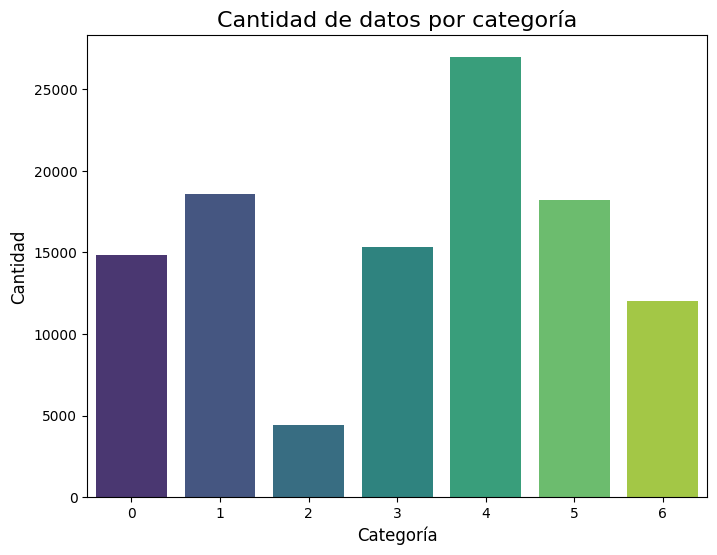

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Obtener los conteos de las categorías
conteo_labels = df_combined['label'].value_counts()

# Ordenar las categorías (de 0 a 6 en este caso)
orden_categorias = list(range(7))  # Crea la lista de categorías en el orden deseado
conteo_labels = conteo_labels.reindex(orden_categorias, fill_value=0)  # Reorganiza y rellena con 0 si faltan categorías


# Gráfica usando seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x=conteo_labels.index, y=conteo_labels.values, palette='viridis', order=orden_categorias)
plt.title('Cantidad de datos por categoría', fontsize=16)
plt.xlabel('Categoría', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)
plt.xticks(rotation=0)
plt.show()

In [ ]:
from imgaug import augmenters as iaa
import numpy as np
import cv2
import os

def load_and_preprocess_images(df, img_size=(48, 48), augment=False):
    images = []
    labels = []

    # Configurar augmenters
    aug = iaa.Sequential([
        iaa.Affine(rotate=(-15, 15)),
        iaa.Fliplr(0.5),
        iaa.Multiply((0.8, 1.2)),
    ]) if augment else None

    for _, row in df.iterrows():
        if not os.path.exists(row['image_path']):
            print(f"Imagen no encontrada: {row['image_path']}")
            continue

        # Leer la imagen
        img = cv2.imread(row['image_path'])
        if img is None:
            print(f"Error al cargar la imagen: {row['image_path']}")
            continue

        # Convertir a escala de grises y redimensionar
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, img_size)

        # Asegurarse de que la imagen está en formato uint8
        img = img.astype(np.uint8)

        # Aplicar data augmentation (si está habilitado)
        if augment:
            img = aug.augment_image(img)

        # Normalizar la imagen (convertir a float después de augmentación)
        img = img / 255.0

        images.append(img)
        labels.append(row['label'])

    # Convertir a numpy arrays
    images = np.array(images).reshape(-1, img_size[0], img_size[1], 1)
    labels = np.array(labels)

    return images, labels

In [ ]:
import os
import pandas as pd

# Filtra las imágenes de la clase 3
df_class_3 = df_combined[df_combined['label'] == 3]


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import numpy as np

# Configura las transformaciones
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
# Directorio de salida para las imágenes aumentadas
output_dir = "augmented_class_3"
os.makedirs(output_dir, exist_ok=True)

# Tamaño de las imágenes (ajustar si es diferente)
img_size = (48, 48)

# Número de imágenes aumentadas por ejemplo original
n_augmentations = 5

for index, row in df_class_3.iterrows():
    img_path = row['image_path']

    # Cargar la imagen original
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"Error al cargar la imagen: {img_path}")
        continue

    # Redimensionar si es necesario
    img = cv2.resize(img, img_size)

    # Expandir dimensión para adaptarse a ImageDataGenerator
    img = np.expand_dims(img, axis=-1)
    img = np.expand_dims(img, axis=0)  # (1, img_size[0], img_size[1], 1)

    # Generar imágenes aumentadas
    i = 0
    for batch in datagen.flow(img, batch_size=1, save_to_dir=output_dir,
                              save_prefix='class_3', save_format='png'):
        i += 1
        if i >= n_augmentations:
            break  # Limitar el número de augmentaciones por imagen

print(f"Datos aumentados guardados en: {output_dir}")


Datos aumentados guardados en: augmented_class_3


In [ ]:
import os
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import numpy as np

# Configura las transformaciones
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Filtra las imágenes de la clase 2
df_class_2 = df_combined[df_combined['label'] == 2]

# Directorio de salida para las imágenes aumentadas
output_dir = "augmented_class_2"
os.makedirs(output_dir, exist_ok=True)

# Tamaño de las imágenes (ajustar si es diferente)
img_size = (48, 48)

# Número de imágenes aumentadas por ejemplo original
n_augmentations = 5

for index, row in df_class_2.iterrows():
    img_path = row['image_path']

    # Cargar la imagen original
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"Error al cargar la imagen: {img_path}")
        continue

    # Redimensionar si es necesario
    img = cv2.resize(img, img_size)

    # Expandir dimensión para adaptarse a ImageDataGenerator
    img = np.expand_dims(img, axis=-1)
    img = np.expand_dims(img, axis=0)  # (1, img_size[0], img_size[1], 1)

    # Generar imágenes aumentadas
    i = 0
    for batch in datagen.flow(img, batch_size=1, save_to_dir=output_dir,
                              save_prefix='class_3', save_format='png'):
        i += 1
        if i >= n_augmentations:
            break  # Limitar el número de augmentaciones por imagen

print(f"Datos aumentados guardados en: {output_dir}")

Datos aumentados guardados en: augmented_class_2


In [ ]:
import glob

# Obtener los nuevos paths de las imágenes aumentadas
augmented_images = glob.glob(os.path.join(output_dir, "*.png"))

# Crear un nuevo dataframe para las imágenes aumentadas
df_augmented = pd.DataFrame({
    'image_path': augmented_images,
    'label': 3  # Etiqueta correspondiente
})

# Concatenar con el dataset original
df_new = pd.concat([df_combined, df_augmented], ignore_index=True)


In [ ]:
import glob

# Obtener los nuevos paths de las imágenes aumentadas
augmented_images = glob.glob(os.path.join(output_dir, "*.png"))

# Crear un nuevo dataframe para las imágenes aumentadas
df_augmented = pd.DataFrame({
    'image_path': augmented_images,
    'label': 2  # Etiqueta correspondiente
})

# Concatenar con el dataset original
df_new = pd.concat([df_combined, df_augmented], ignore_index=True)


In [ ]:
# Verificar la distribución de las etiquetas
print(df_new['label'].value_counts())

label
4    26967
1    18594
5    18231
3    15363
0    14859
2    13316
6    12006
Name: count, dtype: int64


In [ ]:
# Ver las primeras filas del nuevo DataFrame
print(df_new.head())


# Verificar la distribución de las etiquetas
print(df_new['label'].value_counts())

                                          image_path  label
0  /content/face-emotion-dataset/test/neutral/Pub...      1
1  /content/face-emotion-dataset/test/neutral/248...      1
2  /content/face-emotion-dataset/test/neutral/488...      1
3  /content/face-emotion-dataset/test/neutral/585...      1
4  /content/face-emotion-dataset/test/neutral/Pub...      1
label
4    26967
1    18594
5    18231
3    15363
0    14859
2    13316
6    12006
Name: count, dtype: int64


In [ ]:
from sklearn.utils import resample

# Crear un DataFrame para cada clase
dfs = [df_new[df_new['label'] == label] for label in df_new['label'].unique()]

# Igualar al tamaño de la clase más pequeña
min_size = min(len(df) for df in dfs)
dfs_resampled = [resample(df, replace=False, n_samples=min_size, random_state=42) for df in dfs]

# Reunir las clases balanceadas
df_balanced = pd.concat(dfs_resampled)

# Verificar las nuevas distribuciones
print(df_balanced['label'].value_counts())


label
1    12006
2    12006
3    12006
4    12006
0    12006
6    12006
5    12006
Name: count, dtype: int64


In [ ]:
# Dividir en entrenamiento (60%), validación (20%) y prueba (20%)
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

def load_and_preprocess_images(df, img_size=(48, 48)):
    images = []
    labels = []

    for index, row in df.iterrows():
        # Verificar si la imagen existe
        if not os.path.exists(row['image_path']):
            print(f"Imagen no encontrada: {row['image_path']}")
            continue  # Salta a la siguiente imagen

        # Cargar la imagen
        img = cv2.imread(row['image_path'])

        if img is None:
            print(f"Error al cargar la imagen: {row['image_path']}")
            continue  # Salta a la siguiente imagen

        # Convertir la imagen a escala de grises
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Redimensionar la imagen
        img = cv2.resize(img, img_size)

        # Normalizar la imagen
        img = img / 255.0

        images.append(img)
        labels.append(row['label'])

    # Convertir a arrays de numpy
    images = np.array(images)
    labels = np.array(labels)

    # Para la compatibilidad con CNN
    images = images.reshape(-1, img_size[0], img_size[1], 1)  # Para imágenes en escala de grises

    return images, labels

# Cargar y preprocesar las imágenes y etiquetas
images, labels = load_and_preprocess_images(df_combined)

# Dividir en entrenamiento (60%), validación (20%) y prueba (20%)
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Entrenamiento: {len(X_train)} muestras")
print(f"Validación: {len(X_val)} muestras")
print(f"Prueba: {len(X_test)} muestras")

Entrenamiento: 66258 muestras
Validación: 22086 muestras
Prueba: 22087 muestras


In [23]:
!pip install tensorflow
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense, Dropout

# Parámetros del modelo
input_shape = (48, 48, 1)  # Cambia según las dimensiones de tus imágenes
num_classes = 7

# Definición del modelo
model = Sequential([
    # Capa 1: Convolución + BatchNormalization + ReLU + MaxPooling
    Conv2D(32, (3, 3), padding='same', input_shape=input_shape),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Capa 2: Convolución + BatchNormalization + ReLU + MaxPooling
    Conv2D(64, (3, 3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Capa 3: Convolución + BatchNormalization + ReLU + MaxPooling
    Conv2D(128, (3, 3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Capa 4: Convolución adicional + BatchNormalization + ReLU + MaxPooling
    Conv2D(256, (3, 3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Capa 5: Convolución adicional + BatchNormalization + ReLU + MaxPooling
    Conv2D(512, (3, 3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Capa de aplanamiento
    Flatten(),

    # Capa completamente conectada
    Dense(512),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),  # Regularización

    # Capa de salida
    Dense(num_classes, activation='softmax')  # Softmax para clasificación
])

# Compilación del modelo
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Resumen del modelo
model.summary()

# Definición del EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',        # Métrica a monitorear (puede ser 'val_loss' o 'val_accuracy')
    patience=3,                # Número de épocas sin mejora antes de detenerse
    restore_best_weights=True  # Restaura los pesos del modelo cuando se alcanza el mejor rendimiento
)

# Entrenamiento del modelo con EarlyStopping
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,  # Número de épocas ajustable
    batch_size=32,
    verbose=1,
    callbacks=[early_stopping]  # Añade el callback de EarlyStopping
)

# Evaluación del modelo en los datos de prueba
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Precisión en el conjunto de prueba: {test_acc}")

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 48, 48, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 48, 48, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 48, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 24, 24, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 6, 6, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 3, 3, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 3, 3, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_10 (Activation)           │ (None, 3, 3, 512)           │              

 Total params: 1,840,263 (7.02 MB)

 Trainable params: 1,837,255 (7.01 MB)

 Non-trainable params: 3,008 (11.75 KB)

Epoch 1/10
2071/2071 ━━━━━━━━━━━━━━━━━━━━ 949s 456ms/step - accuracy: 0.3930 - loss: 1.6775 - val_accuracy: 0.4939 - val_loss: 1.3761
Epoch 2/10
2071/2071 ━━━━━━━━━━━━━━━━━━━━ 1004s 466ms/step - accuracy: 0.6077 - loss: 1.0531 - val_accuracy: 0.6045 - val_loss: 1.0726
Epoch 3/10
2071/2071 ━━━━━━━━━━━━━━━━━━━━ 928s 448ms/step - accuracy: 0.7038 - loss: 0.8161 - val_accuracy: 0.5316 - val_loss: 1.3303
Epoch 4/10
2071/2071 ━━━━━━━━━━━━━━━━━━━━ 971s 443ms/step - accuracy: 0.7947 - loss: 0.5754 - val_accuracy: 0.6216 - val_loss: 1.1960
Epoch 5/10
2071/2071 ━━━━━━━━━━━━━━━━━━━━ 940s 451ms/step - accuracy: 0.8706 - loss: 0.3794 - val_accuracy: 0.7747 - val_loss: 0.7273
Epoch 6/10
2071/2071 ━━━━━━━━━━━━━━━━━━━━ 970s 446ms/step - accuracy: 0.9112 - loss: 0.2615 - val_accuracy: 0.7107 - val_loss: 1.0141
Epoch 7/10
2071/2071 ━━━━━━━━━━━━━━━━━━━━ 1049s 478ms/step - accuracy: 0.9353 - loss: 0.1923 - val_accuracy: 0.8281 - val_loss: 0.6435
Epoch 8/10
2071/2071 ━━━━━━━━━━━━━━━━━━━━ 994s 455ms/step - 

In [24]:
# Evaluar en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(X_val, y_val)
print(f"Loss en test: {test_loss}, Accuracy en test: {test_accuracy}")


691/691 ━━━━━━━━━━━━━━━━━━━━ 61s 89ms/step - accuracy: 0.8296 - loss: 0.6277
Loss en test: 0.6434927582740784, Accuracy en test: 0.8281264305114746


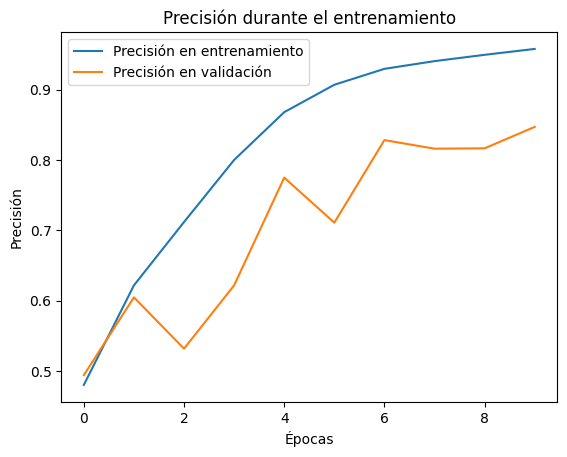

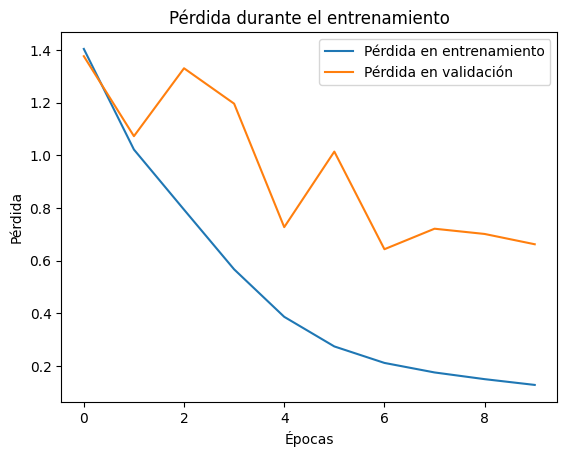

In [25]:
import matplotlib.pyplot as plt

# Graficar la precisión durante el entrenamiento
plt.plot(history.history['accuracy'], label='Precisión en entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.title('Precisión durante el entrenamiento')
plt.show()

# Graficar la pérdida durante el entrenamiento
plt.plot(history.history['loss'], label='Pérdida en entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Pérdida durante el entrenamiento')
plt.show()


In [28]:
# Obtener las predicciones (probabilidades)
y_pred_probs = model.predict(X_test)

# Convertir probabilidades a etiquetas (clase con mayor probabilidad)
y_pred = np.argmax(y_pred_probs, axis=1)

691/691 ━━━━━━━━━━━━━━━━━━━━ 65s 93ms/step


In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Crear matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(conf_matrix)

Matriz de confusión:
[[2446  185    3   54   66  158   19]
 [  90 3454    7   16   49  120    4]
 [  92   49  654   21    9   42    6]
 [ 227  303   10 2151   65  222   95]
 [  64  434   12   31 4792   73   37]
 [ 191  461   11  110   42 2845   16]
 [  41   84    0   52   72   19 2083]]


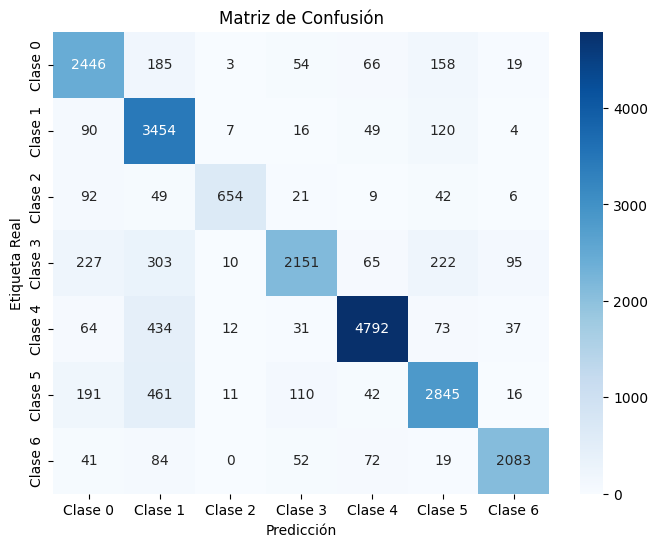

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Etiquetas de las clases
class_names = ['Clase 0', 'Clase 1', 'Clase 2', 'Clase 3', 'Clase 4', 'Clase 5', 'Clase 6']

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Etiqueta Real')
plt.show()

In [32]:
from sklearn.metrics import classification_report

# Generar reporte de clasificación
report = classification_report(y_test, y_pred, target_names=["Clase 0", "Clase 1", "Clase 2", "Clase 3", "Clase 4", "Clase 5", "Clase 6"])
print(report)

              precision    recall  f1-score   support

     Clase 0       0.78      0.83      0.80      2931
     Clase 1       0.69      0.92      0.79      3740
     Clase 2       0.94      0.75      0.83       873
     Clase 3       0.88      0.70      0.78      3073
     Clase 4       0.94      0.88      0.91      5443
     Clase 5       0.82      0.77      0.80      3676
     Clase 6       0.92      0.89      0.90      2351

    accuracy                           0.83     22087
   macro avg       0.85      0.82      0.83     22087
weighted avg       0.85      0.83      0.84     22087



691/691 ━━━━━━━━━━━━━━━━━━━━ 64s 92ms/step


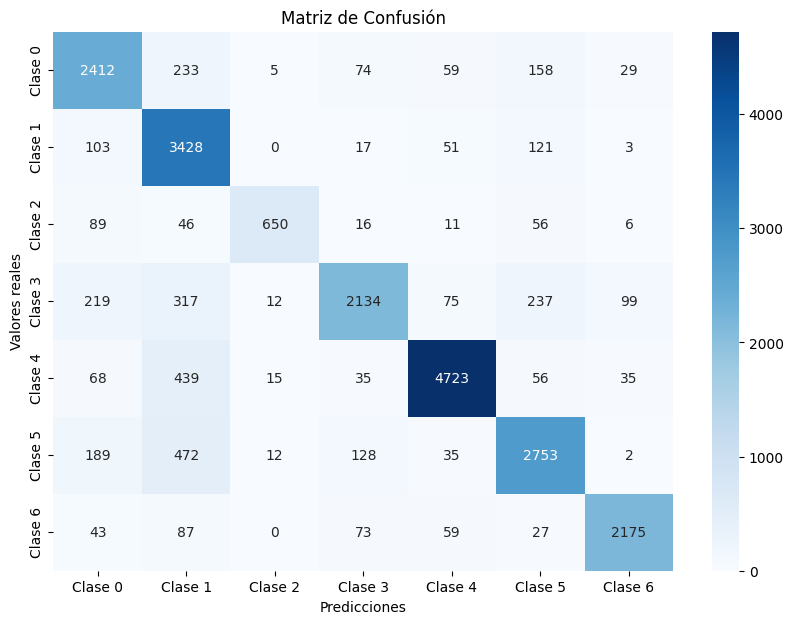

In [33]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Predicciones de probabilidades del modelo (por ejemplo, para las 7 clases)
y_pred_proba = model.predict(X_val)

thresholds = [0.7, 0.4, 0.4, 0.5, 0.45, 0.45, 0.5]  # Define los umbrales para cada clase
y_pred_adjusted = []

for probs in y_pred_proba:
    # Para cada clase, asignar la clase si la probabilidad supera el umbral, o 0 si no
    predicted_class = np.argmax([p if p >= thresholds[i] else 0 for i, p in enumerate(probs)])

    # Si ninguna clase supera su umbral, elige la clase con la mayor probabilidad
    if probs[predicted_class] < thresholds[predicted_class]:
        predicted_class = np.argmax(probs)  # Asignar la clase con mayor probabilidad si no se supera el umbral

    y_pred_adjusted.append(predicted_class)

# Convertir la lista de clases ajustadas en un array para usarla en la matriz de confusión
y_pred_adjusted = np.array(y_pred_adjusted)

# Calcular la matriz de confusión
cm = confusion_matrix(y_val, y_pred_adjusted)

# Mostrar la matriz de confusión
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[f'Clase {i}' for i in range(7)], yticklabels=[f'Clase {i}' for i in range(7)])
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de Confusión')
plt.show()


In [34]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, classification_report

# Paso 1: Predicciones originales (sin umbral ajustado)
y_pred_original = np.argmax(model.predict(X_val), axis=1)  # Predicciones usando la clase con la mayor probabilidad

# Métricas antes de ajustar los umbrales
precision_original = precision_score(y_val, y_pred_original, average='weighted')
recall_original = recall_score(y_val, y_pred_original, average='weighted')
f1_original = f1_score(y_val, y_pred_original, average='weighted')
accuracy_original = accuracy_score(y_val, y_pred_original)

print("Métricas antes de ajustar umbrales:")
print(f"Precisión: {precision_original:.4f}")
print(f"Recall: {recall_original:.4f}")
print(f"F1-Score: {f1_original:.4f}")
print(f"Exactitud: {accuracy_original:.4f}")
print("\nReporte de clasificación original:\n", classification_report(y_val, y_pred_original))

# Paso 2: Predicciones ajustadas (con umbrales)
y_pred_adjusted = []

for probs in y_pred_proba:
    # Para cada clase, asignar la clase si la probabilidad supera el umbral, o 0 si no
    predicted_class = np.argmax([p if p >= thresholds[i] else 0 for i, p in enumerate(probs)])

    # Si ninguna clase supera su umbral, elige la clase con la mayor probabilidad
    if probs[predicted_class] < thresholds[predicted_class]:
        predicted_class = np.argmax(probs)  # Asignar la clase con mayor probabilidad si no se supera el umbral

    y_pred_adjusted.append(predicted_class)

# Convertir la lista de clases ajustadas en un array para usarla en la matriz de confusión
y_pred_adjusted = np.array(y_pred_adjusted)

# Métricas después de ajustar los umbrales
precision_adjusted = precision_score(y_val, y_pred_adjusted, average='weighted')
recall_adjusted = recall_score(y_val, y_pred_adjusted, average='weighted')
f1_adjusted = f1_score(y_val, y_pred_adjusted, average='weighted')
accuracy_adjusted = accuracy_score(y_val, y_pred_adjusted)

print("\nMétricas después de ajustar umbrales:")
print(f"Precisión: {precision_adjusted:.4f}")
print(f"Recall: {recall_adjusted:.4f}")
print(f"F1-Score: {f1_adjusted:.4f}")
print(f"Exactitud: {accuracy_adjusted:.4f}")
print("\nReporte de clasificación ajustado:\n", classification_report(y_val, y_pred_adjusted))


691/691 ━━━━━━━━━━━━━━━━━━━━ 65s 94ms/step
Métricas antes de ajustar umbrales:
Precisión: 0.8407
Recall: 0.8281
F1-Score: 0.8293
Exactitud: 0.8281

Reporte de clasificación original:
               precision    recall  f1-score   support

           0       0.77      0.82      0.79      2970
           1       0.69      0.92      0.79      3723
           2       0.94      0.74      0.83       874
           3       0.86      0.69      0.77      3093
           4       0.94      0.88      0.91      5371
           5       0.81      0.76      0.79      3591
           6       0.93      0.88      0.90      2464

    accuracy                           0.83     22086
   macro avg       0.85      0.81      0.82     22086
weighted avg       0.84      0.83      0.83     22086


Métricas después de ajustar umbrales:
Precisión: 0.8404
Recall: 0.8274
F1-Score: 0.8287
Exactitud: 0.8274

Reporte de clasificación ajustado:
               precision    recall  f1-score   support

           0       0

In [35]:
# Guardar el modelo entrenado
model.save('Clasificador_last.h5')


In [ ]:
from google.colab import files
files.download('Clasificador_emociones.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>